Tasks: Clean data, relax assumptions, log transformations, create a model

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

ModuleNotFoundError: No module named 'statsmodels'

### Load data

In [ ]:
raw_data = pd.read_csv('/Users/josephdecommer/Documents/coding2022/Python/Data Sets/1.04. Real-life example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [ ]:
raw_data.dtypes, raw_data.shape

(Brand            object
 Price           float64
 Body             object
 Mileage           int64
 EngineV         float64
 Engine Type      object
 Registration     object
 Year              int64
 Model            object
 dtype: object,
 (4345, 9))

## Preprocessing

Explore the descriptive statistics of variables

In [ ]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Determine the variables of interest

In [ ]:
data = raw_data.drop(['Model'], axis = 1) #axis 0 = rows, 1 = columns
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Eliminating missing values

In [ ]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
data_no_mv = data.dropna(axis = 0) # MV = missing values

In [ ]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Explore PDFs

In [ ]:
sns.displot(data_no_mv['Price'], color='red')

NameError: name 'data_no_mv' is not defined

Deal with outliers -- the quantile method

In [ ]:
q = data_no_mv['Price'].quantile(0.99) # <-- Drops the top 1% of values
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [ ]:
sns.displot(data_no_mv['Mileage'], color = 'magenta')

NameError: name 'data_no_mv' is not defined

In [ ]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]


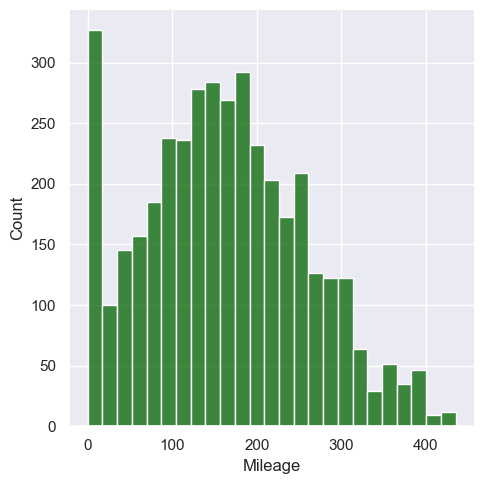

In [ ]:
sns.displot(data_2['Mileage'], color = 'darkgreen')

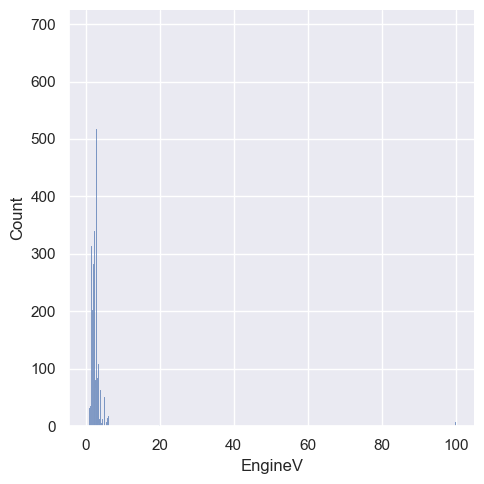

In [ ]:
sns.displot(data_no_mv['EngineV'])

In [ ]:
data_3 = data_2[data_2["EngineV"]<6.5] # <---- Upper bound of engine volume

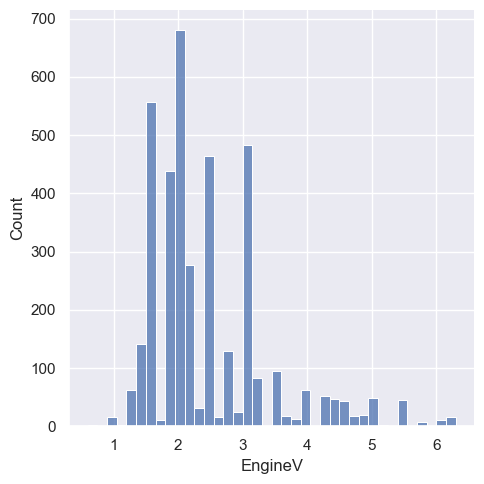

In [ ]:
sns.displot(data_3['EngineV'])

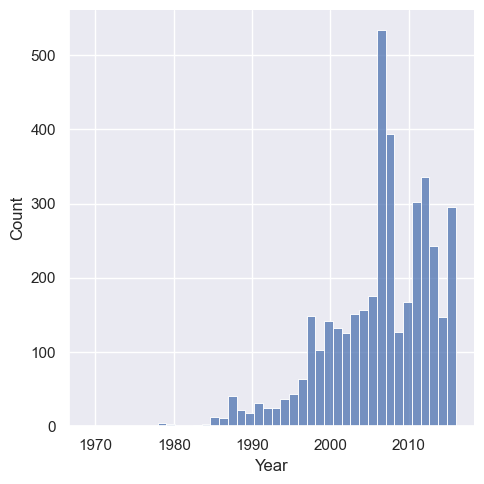

In [ ]:
sns.displot(data_no_mv['Year'])

In [ ]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

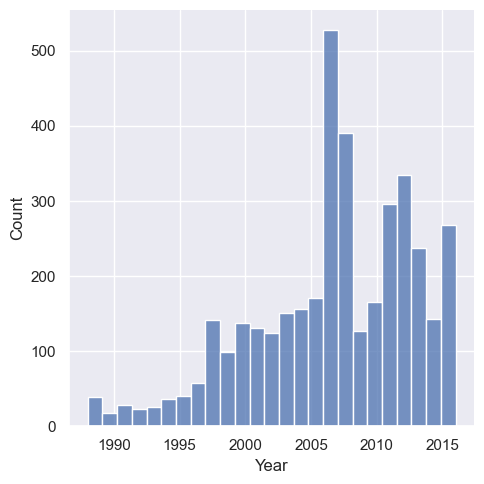

In [ ]:
sns.displot(data_4['Year'] )

In [ ]:
data_cleaned = data_4.reset_index(drop=True)

In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking OLS assumptions

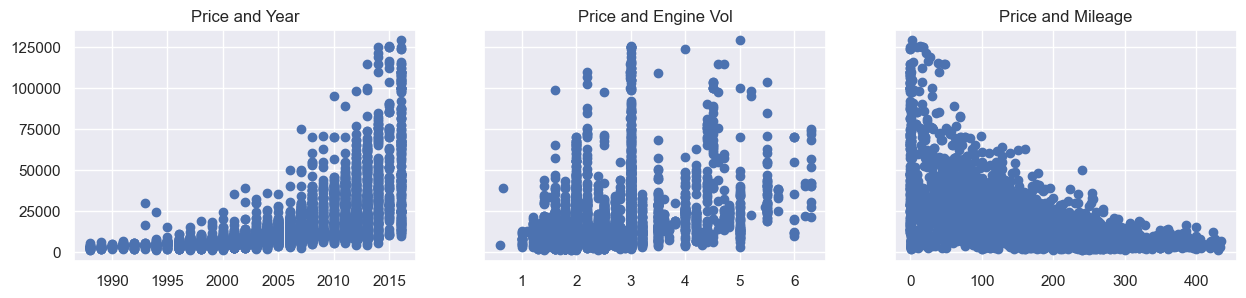

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and Engine Vol')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show() # results are not linear, they are exponetial

Relaxing assumptions

In [ ]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


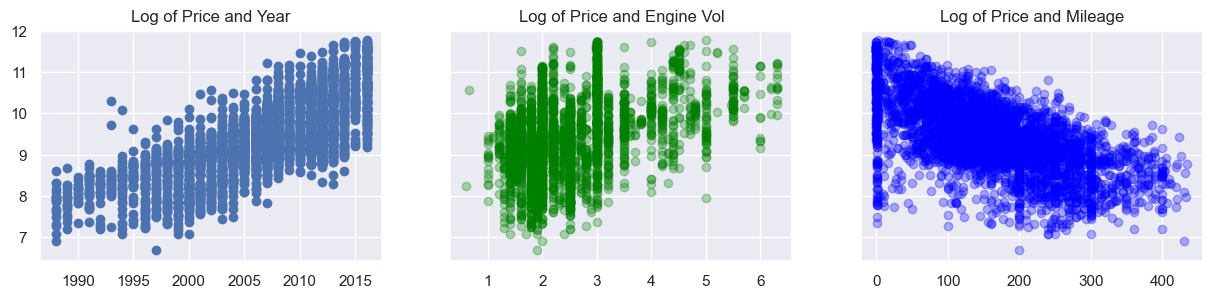

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log of Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'], color = 'green', alpha = 0.3)
ax2.set_title('Log of Price and Engine Vol')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'], color = 'blue', alpha = 0.3)
ax3.set_title('Log of Price and Mileage')

plt.show() # This kind of forces linearity. By logging the y values it compresses them when compared to the above plts

In [ ]:
data_cleaned = data_cleaned.drop(['Price'], axis =1 ) #axis 0 = rows, 1 = columns

### Normality and Homoscedasticity
Assumptions are: normality, zero mean, homoscedasticity(log transformations are the most common fix),
no autocorrelation(no serial corelation)

## Multicollinearity

In [ ]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [ ]:
#Can't do because of statsmodles not working

# Variance inflation factor:
    #VIF =  1 means no multicolinearity, 1 - 5 is okay, 5 - 10 is unacceptable 

In [ ]:
data_no_multicolinearity = data_cleaned.drop(['Year'], axis = 1)

## Create Dummy Variables
Dummy variables = categories(n) - 1

In [ ]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity, drop_first=True)


In [ ]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange

In [ ]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

In [ ]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

# One should not standardize dummy variables

In [ ]:
inputs_scaled = scaler.transform(inputs)

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=43)

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_hat = reg.predict(x_train)

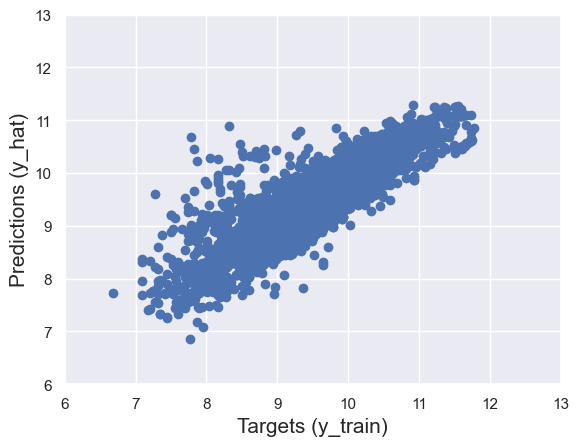

In [ ]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 15)
plt.ylabel('Predictions (y_hat)', size = 15)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

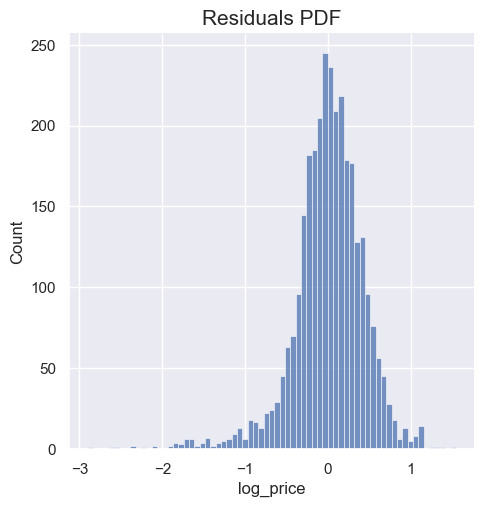

In [ ]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size = 15)

In [ ]:
reg.score(x_train, y_train)

0.7529744855146684

In [ ]:
reg.intercept_

9.414729290240768

In [ ]:
reg.coef_

array([-0.45939403,  0.21626039,  0.01129949,  0.00159814, -0.13896388,
       -0.18458786, -0.06141931, -0.09616037, -0.14711836, -0.09695179,
       -0.19195248, -0.11128571, -0.16366812, -0.12119419, -0.03031622,
       -0.15413803,  0.32710034])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary # This model is not interpretable because of the log transpositions and dummies

#Positive weights show a more positive correlation with price, generally the bigger the engine, the higher the price. 

,Features,Weights
0,Mileage,-0.459394
1,EngineV,0.216260
2,Brand_BMW,0.011299
3,Brand_Mercedes-Benz,0.001598
4,Brand_Mitsubishi,-0.138964
5,Brand_Renault,-0.184588
6,Brand_Toyota,-0.061419
7,Brand_Volkswagen,-0.096160
8,Body_hatch,-0.147118
9,Body_other,-0.096952


In [ ]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

# Testing

In [ ]:
y_hat_test = reg.predict(x_test)

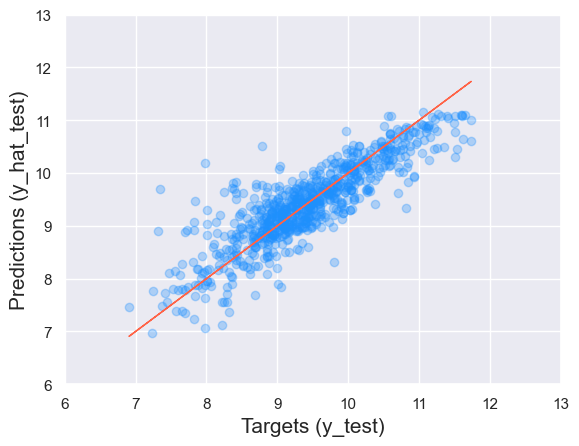

In [ ]:
plt.scatter(y_test, y_hat_test, alpha = 0.3, c= 'dodgerblue')
plt.xlabel('Targets (y_test)', size = 15)
plt.ylabel('Predictions (y_hat_test)', size = 15)
plt.plot(y_test, y_test, lw=1, c='tomato', label='Regression Line')
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [ ]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,14539.821587
1,16042.573631
2,24766.362618
3,25581.760274
4,25282.707171


In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf.head() 

,Prediction,Target
0,14539.821587,4200.0
1,16042.573631,NaN
2,24766.362618,NaN
3,25581.760274,NaN
4,25282.707171,NaN


In [ ]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0     9.510445
1     9.560997
2    10.257659
3    10.518673
4    10.122623
Name: log_price, dtype: float64

In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,14539.821587,13500.0
1,16042.573631,14200.0
2,24766.362618,28500.0
3,25581.760274,37000.0
4,25282.707171,24900.0


In [ ]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [ ]:
df_pf['% Difference'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,% Difference
0,14539.821587,13500.0,-1039.821587,7.702382
1,16042.573631,14200.0,-1842.573631,12.975871
2,24766.362618,28500.0,3733.637382,13.100482
3,25581.760274,37000.0,11418.239726,30.860107
4,25282.707171,24900.0,-382.707171,1.536977
...,...,...,...,...
769,25392.901755,39000.0,13607.098245,34.889995
770,6763.551218,6450.0,-313.551218,4.861259
771,15875.257095,28500.0,12624.742905,44.297344
772,4627.451951,4600.0,-27.451951,0.596782


In [ ]:
df_pf.describe()

,Prediction,Target,Residual,% Difference
count,774.000000,774.000000,774.000000,774.000000
mean,16338.034811,18248.998114,1910.963303,37.183317
std,13147.835932,19126.040027,10348.002741,63.873187
min,1062.516424,999.000000,-30282.722605,0.000425
25%,7883.881149,7200.000000,-2179.720469,11.256024
50%,12269.820916,11750.000000,272.062668,23.126521
75%,19927.045941,21675.000000,3240.542888,41.501936
max,70632.084716,125000.000000,84397.287198,951.255075


In [ ]:
pd.options.display.max_rows = 100
df_pf.sort_values(by=['% Difference'])

,Prediction,Target,Residual,% Difference
155,3499.985125,3500.00,0.014875,0.000425
709,8951.373309,8950.00,-1.373309,0.015344
90,17005.154873,16999.00,-6.154873,0.036207
569,52146.069155,52055.25,-90.819155,0.174467
283,8683.044969,8700.00,16.955031,0.194885
...,...,...,...,...
732,7355.409279,1500.00,-5855.409279,390.360619
621,12972.103281,2550.00,-10422.103281,408.709933
87,36782.722605,6500.00,-30282.722605,465.888040
430,26566.044805,2900.00,-23666.044805,816.070511
